# Optimization 
### Emma Rasmussen 

## Problem 1- Washboard Potential
### Part a


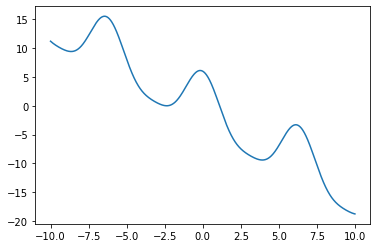

The local minimum to the left of zero is -0.0013575275319008817
The local maximium around zero is 6.125676181326704


In [2]:
import numpy as np 
import matplotlib.pyplot as plt

def V(r): 
    V = 5*np.cos(r) + np.cos(2*r) - 1.5*r 
    return V 

x = np.linspace(-10, 10, 1000)
plt.plot(x, V(x))
plt.show()

minvals = []
maxvals = []
for i in range(len(x)):
    if x[i] < -1:
        v = V(x[i])
        minvals.append(v)
    if -1 < x[i] < 1:
        v = V(x[i])
        maxvals.append(v)

print(f'The local minimum to the left of zero is {min(minvals)}')
print(f'The local maximium around zero is {max(maxvals)}')

The potential barrier seems to be *** 

### Part b 

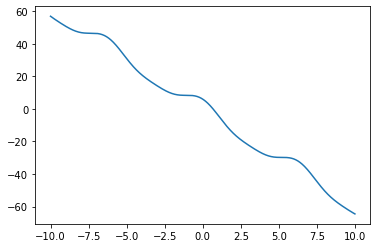

The rough estimate of Fc is 6.0733677415434295
The estimated location for where the local min and max merge is -1.0921452082503198


In [21]:
import scipy.optimize as opt

def V2(r, F): 
    V = 5*np.cos(r) + np.cos(2*r) - F*r 
    return V 

def Vd1(r, F):
    dV = -5*np.sin(r) - 2*np.sin(2*r) - F
    return dV

def Vd2(r, F): 
    d2V = -5*np.cos(r) - 4*np.cos(2*r)
    return d2V

def fun(x):
    F, r = x
    eq1 = Vd1(r, F)
    eq2 = Vd2(r, F)
    return [eq1, eq2]

initialguess = [0, -1]

Fc, rc = opt.fsolve(fun, initialguess)

plt.plot(x, V2(x, Fc))
plt.show()

print(f'The rough estimate of Fc is {Fc}')
print(f'The estimated location for where the local min and max merge is {rc}')

## Problem 2- Sloppy Minimization 
### Part a

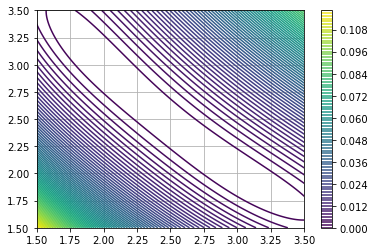

In [99]:
# def y(t,N,l):
#     y = (1/N)*(sum(l*np.exp(-l*t)) in range(N - 1))
#     return y
def y(t,N,l):
     y = (1/N)*2*(l*np.exp(-l*t))
     return y

def y0(t):
    y0 = np.exp(-2*t) + (3/2)*np.exp(-3*t)
    return y0

def c(l0, l1):
    c = -(51/40) + (l0/8) - (l0)/(2 + l0) - (3*l0)/(2*(3 + l0)) + (l1/8) + 2/(2+l1) + 9/(2*(3 + l1)) + (l0*l1)/(2*(l0 + l1))
    return c

N = 2
l0 = np.linspace(1.5, 3.5, 1000)
l1 = np.linspace(1.5, 3.5, 1000)

L0,L1 = np.meshgrid(l0,l1)
C = c(L0,L1)

con = plt.contour(L0,L1,C,levels=100)
plt.colorbar(con)
plt.grid(True)
plt.show()

### Part b

The optimal lambda value is 2.474939667460142.
This value should be in the middle of the gap in our contour plot.


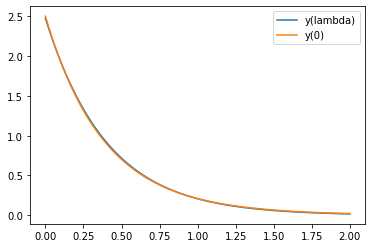

I would agree that these are very hard to distinguish.


In [100]:
def Cmin(l):
    c = -(51/40) + (l/8) - (l)/(2 + l) - (3*l)/(2*(3 + l)) + (l/8) + 2/(2+l) + 9/(2*(3 + l)) + (l*l)/(2*(l + l))
    return c

minl = opt.minimize_scalar(Cmin, bounds={1.5,3.5}, method='bounded')
optl = minl.x
print(f'The optimal lambda value is {optl}.')
print(f'This value should be in the middle of the gap in our contour plot.')

x1 = np.linspace(0, 2, 100)

plt.plot(x1,y(x1,N,optl), label='y(lambda)')
plt.plot(x1,y0(x1), label='y(0)')
plt.legend()
plt.show()

print(f'I would agree that these are very hard to distinguish.')

### Part c

<ipython-input-101-71968aefd591>:22: RuntimeWarning: divide by zero encountered in log
  con = plt.contour(L0,L1,np.log(C),levels=10)
<ipython-input-101-71968aefd591>:22: RuntimeWarning: invalid value encountered in log
  con = plt.contour(L0,L1,np.log(C),levels=10)


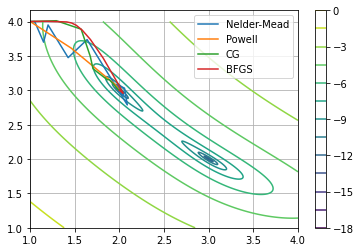

In [101]:
def cp(guess):
    l0,l1 = guess
    c = -(51/40) + (l0/8) - (l0)/(2 + l0) - (3*l0)/(2*(3 + l0)) + (l1/8) + 2/(2+l1) + 9/(2*(3 + l1)) + (l0*l1)/(2*(l0 + l1))
    return c

def minimize(method, initial):
    evalpts = [initial]
    
    def callback(x):
        evalpts.append(x)
    
    result = opt.minimize(cp, initial, method=method, callback=callback)
    return evalpts

N = 2
l0 = np.linspace(1, 4, 1000)
l1 = np.linspace(1, 4, 1000)

L0,L1 = np.meshgrid(l0,l1)
C = c(L0,L1)

con = plt.contour(L0,L1,np.log(C),levels=10)
plt.colorbar(con)
plt.grid(True)

guess = [1,4]
methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS']
for i in methods:
    evalpts = minimize(i, guess)
    evalpts = np.array(evalpts)
    plt.plot(evalpts[:,0], evalpts[:,1], label=i)

plt.legend()
plt.show()


## Problem 3- Convex Functions

### Part a

For this part, we need to show that $||x||_p$ is a convex function for any $p\:\ge1$. 

We know that $||x||_p\:=\:\left(\sum_{k=0}^{n-1}|x_k|^p\right)^{\frac{1}{p}}$. 

The Minowski inequality holds for $p\:\ge1$:

$||\:x\:+\:y\:||_p\le||\:x\:||_p\:+\:||\:y\:||_p$

Now let's look at the triangle inequality, which uses the definition of convexity: 

$ ||\lambda x + (1-\lambda)y||$

We can then rewrite it in a form akin to the Minowski inequality: 

$ ||\lambda x + (1-\lambda)y||_p\:\le \lambda ||x||_p + (1-\lambda)||y||_p$

$ ||x||_p \le \lambda||\lambda x||_p + (1 - \lambda)||(1 - \lambda)y||_p$

Since we are able to do this, it shows that norms with $p\:\ge1$ are convex since the triangle inequality holds for them. 

### Part b

## Problem 4- Convex Optimization

### Part a 

I chose cvxpy for mine. Some algorithms they have availabne are interior point methods, SCP, proximal gradient methods, and for ADMM. 

### Part b

In [1]:
%pip install cvxpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import cvxpy as cp
# import pandas as pd

# j = pd.read_csv('J.txt', sep='\t', header=None).values
# x0 = pd.read_csv('x0.txt', header=None).values.flatten()

# n = len(x0)
# lamb = cp.Parameter()
# x0 = cp.Constant(x0)
# j = cp.Constant(j)

# lambdas = [0,10**(-8), 10**(-4), 10**(-2), 1]

# for i in lambdas:
#     x = cp.Variable(n)
#     objfun = cp.Minimize(cp.power(cp.norm(cp.matmul(j, x - x0)), 2) + cp.norm(lamb*x,1))
#     opt = cp.Problem(objfun, [xi >= 0 for xi in x])
#     lamb.value = i
#     opt.solve(solver = "SCS")
#     xopt = x.value
#     zeroxvals = np.sum(np.isclose(xopt,0))

#     if opt.status == 'optimal':
#         print(f'For lambda = {i}:')
#         print(f'The optimized objective function value is: {opt.value}')
#         print(f'The number of 0 x compronents is: {zeroxvals}')

#     else:
#         print(f'Could not optimize lambda = {i}')

# import cvxpy as cp
# import pandas as pd

# j = pd.read_csv('J.txt', sep='\t', header=None).values
# x0 = pd.read_csv('x0.txt', header=None).values.flatten()

# n = len(x0)
# lamb = cp.Parameter()
# x0 = cp.Constant(x0)
# j = cp.Constant(j)

# lambdas = [0,10**(-8), 10**(-4), 10**(-2), 1]
# x = cp.Variable(n)
# jxx0 = cp.matmul(j, x - x0)

# for i in lambdas:
#     objfun = cp.Minimize(cp.power(cp.norm(jxx0), 2) + cp.norm(lamb*x,1))
#     opt = cp.Problem(objfun, [x >= 0])
#     lamb.value = i
#     opt.solve(solver = "SCS")
#     xopt = x.value
#     zeroxvals = np.sum(np.isclose(xopt,0))

#     if opt.status == 'optimal':
#         print(f'For lambda = {i}:')
#         print(f'The optimized objective function value is: {opt.value}')
#         print(f'The number of 0 x compronents is: {zeroxvals}')

#     else:
#         print(f'Could not optimize lambda = {i}')

import cvxpy as cp
import pandas as pd
import numpy as np

j = pd.read_csv('J.txt', sep='\t', header=None).values
x0 = pd.read_csv('x0.txt', header=None).values.flatten()

n = len(x0)
lamb = cp.Parameter()
x0 = cp.Constant(x0)
j = cp.Constant(j)

lambdas = [0,10**(-8), 10**(-4), 10**(-2), 1]

for i in lambdas:
    x = cp.Variable(n)
    objfun = cp.Minimize(cp.power(cp.norm(cp.matmul(j, x - x0)), 2) + cp.norm(lamb*x,1))
    opt = cp.Problem(objfun)
    lamb.value = i
    opt.solve(solver=cp.ECOS)
    xopt = x.value
    zeroxvals = np.sum(np.isclose(xopt,0))

    if opt.status == 'optimal':
        print(f'For lambda = {i}:')
        print(f'The optimized objective function value is: {opt.value}')
        print(f'The number of 0 x compronents is: {zeroxvals}')

    else:
        print(f'Could not optimize lambda = {i}')

For lambda = 0:
The optimized objective function value is: 1.8729901860514292e-12
The number of 0 x compronents is: 0
For lambda = 1e-08:
The optimized objective function value is: 6.530505085711481e-05
The number of 0 x compronents is: 0
For lambda = 0.0001:
The optimized objective function value is: 0.46761675879543846
The number of 0 x compronents is: 442
For lambda = 0.01:
The optimized objective function value is: 36.48230486279504
The number of 0 x compronents is: 90
For lambda = 1:
The optimized objective function value is: 2573.0180882981404
The number of 0 x compronents is: 107
